In [1]:
repo_url = "https://github.com/AkkuRam/Group6-BrainTumor"
!git clone {repo_url}

train_dir = "Group6-BrainTumor/dataset/Training"
test_dir = "Group6-BrainTumor/dataset/Testing"


Cloning into 'Group6-BrainTumor'...
remote: Enumerating objects: 12292, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 12292 (delta 0), reused 0 (delta 0), pack-reused 12290 (from 4)
Receiving objects: 100% (12292/12292), 701.51 MiB | 14.33 MiB/s, done.
Resolving deltas: 100% (1497/1497), done.
Updating files: 100% (7101/7101), done.


In [2]:
!pip install timm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 132.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 111.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjit

Run without any fine-tuning

✅ Using device: cuda
📂 Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/55.1M [00:00<?, ?B/s]

Epoch 1: 100%|██████████| 304/304 [00:43<00:00,  6.95it/s]


Epoch 1: Loss=0.3505, Train Acc=89.56%, Val Acc=97.90%


Epoch 2: 100%|██████████| 304/304 [00:42<00:00,  7.13it/s]


Epoch 2: Loss=0.0905, Train Acc=97.34%, Val Acc=97.90%


Epoch 3: 100%|██████████| 304/304 [00:43<00:00,  7.05it/s]


Epoch 3: Loss=0.0314, Train Acc=99.20%, Val Acc=98.02%


Epoch 4: 100%|██████████| 304/304 [00:42<00:00,  7.12it/s]


Epoch 4: Loss=0.0216, Train Acc=99.38%, Val Acc=98.60%


Epoch 5: 100%|██████████| 304/304 [00:42<00:00,  7.12it/s]


Epoch 5: Loss=0.0207, Train Acc=99.36%, Val Acc=97.08%

🧪 Final Test Accuracy: 97.18%


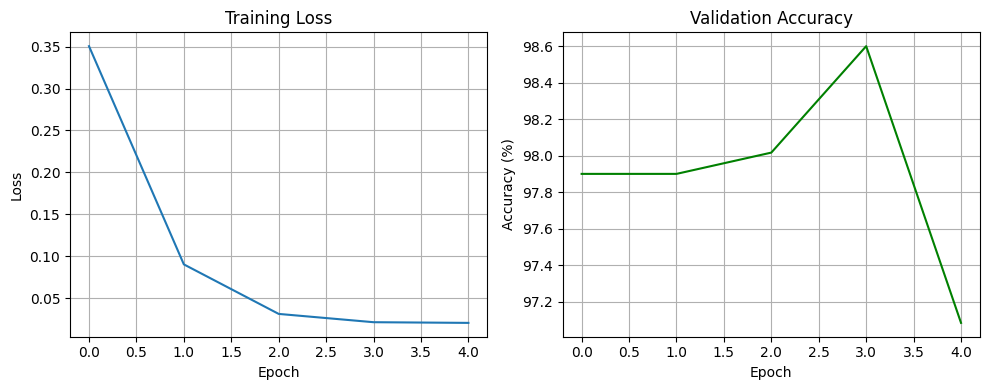

In [3]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
import timm
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Using device: {device}")

# === Parameters ===
batch_size = 16
image_size = 224
num_epochs = 5

# === Image Transforms ===
transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# === Load Dataset ===
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

train_size = int(0.85 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_data, val_data = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# === Model Setup ===
num_classes = len(train_dataset.classes)
print(f"📂 Classes: {train_dataset.classes}")


model = timm.create_model('efficientnetv2_rw_t', pretrained=True)
model.classifier = nn.Linear(model.classifier.in_features, num_classes)
model = model.to(device)

# === Loss and Optimizer ===
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# === Evaluation ===
def evaluate(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = outputs.max(1)
            total += labels.size(0)
            correct += preds.eq(labels).sum().item()
    return 100 * correct / total

# === Training Function ===
train_loss_history = []
val_acc_history = []

def train_model(model, train_loader, val_loader, epochs=num_epochs):
    for epoch in range(epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, preds = outputs.max(1)
            total += labels.size(0)
            correct += preds.eq(labels).sum().item()
        train_acc = 100 * correct / total
        val_acc = evaluate(model, val_loader)
        train_loss_history.append(running_loss/len(train_loader))
        val_acc_history.append(val_acc)
        print(f"Epoch {epoch+1}: Loss={running_loss/len(train_loader):.4f}, "
              f"Train Acc={train_acc:.2f}%, Val Acc={val_acc:.2f}%")

train_model(model, train_loader, val_loader, epochs=num_epochs)

# === Final Test Accuracy ===
test_acc = evaluate(model, test_loader)
print(f"\n🧪 Final Test Accuracy: {test_acc:.2f}%")

# === Plot Training Curve ===
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_loss_history, label="Train Loss")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()

plt.subplot(1,2,2)
plt.plot(val_acc_history, label="Val Accuracy", color="green")
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.grid()
plt.tight_layout()
plt.show()


In [4]:
torch.save(model, "efficientnetv2_finetuned_fullmodel.pth")

### Fine-tuning step

Using device: cuda
📂 Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']


Epoch 1/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 1: Loss=1.2757, Train Acc=50.98%, Val Acc=66.74%


Epoch 2/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 2: Loss=1.0574, Train Acc=73.70%, Val Acc=75.73%


Epoch 3/300: 100%|██████████| 76/76 [00:22<00:00,  3.32it/s]


Epoch 3: Loss=0.8997, Train Acc=80.00%, Val Acc=77.25%


Epoch 4/300: 100%|██████████| 76/76 [00:22<00:00,  3.31it/s]


Epoch 4: Loss=0.7846, Train Acc=82.18%, Val Acc=79.23%


Epoch 5/300: 100%|██████████| 76/76 [00:22<00:00,  3.31it/s]


Epoch 5: Loss=0.6972, Train Acc=83.65%, Val Acc=79.11%


Epoch 6/300: 100%|██████████| 76/76 [00:22<00:00,  3.31it/s]


Epoch 6: Loss=0.6328, Train Acc=84.10%, Val Acc=80.63%


Epoch 7/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 7: Loss=0.5792, Train Acc=85.23%, Val Acc=81.33%


Epoch 8/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 8: Loss=0.5439, Train Acc=85.13%, Val Acc=82.50%


Epoch 9/300: 100%|██████████| 76/76 [00:22<00:00,  3.32it/s]


Epoch 9: Loss=0.5092, Train Acc=85.33%, Val Acc=82.61%


Epoch 10/300: 100%|██████████| 76/76 [00:22<00:00,  3.32it/s]


Epoch 10: Loss=0.4853, Train Acc=86.12%, Val Acc=82.50%


Epoch 11/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 11: Loss=0.4598, Train Acc=86.43%, Val Acc=83.08%


Epoch 12/300: 100%|██████████| 76/76 [00:22<00:00,  3.31it/s]


Epoch 12: Loss=0.4401, Train Acc=86.63%, Val Acc=83.31%


Epoch 13/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 13: Loss=0.4222, Train Acc=87.11%, Val Acc=83.55%


Epoch 14/300: 100%|██████████| 76/76 [00:22<00:00,  3.32it/s]


Epoch 14: Loss=0.4070, Train Acc=87.54%, Val Acc=83.31%


Epoch 15/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 15: Loss=0.3969, Train Acc=87.56%, Val Acc=84.36%


Epoch 16/300: 100%|██████████| 76/76 [00:22<00:00,  3.31it/s]


Epoch 16: Loss=0.3863, Train Acc=87.74%, Val Acc=84.13%


Epoch 17/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 17: Loss=0.3783, Train Acc=87.79%, Val Acc=84.95%


Epoch 18/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 18: Loss=0.3694, Train Acc=87.77%, Val Acc=85.30%


Epoch 19/300: 100%|██████████| 76/76 [00:22<00:00,  3.31it/s]


Epoch 19: Loss=0.3555, Train Acc=88.22%, Val Acc=85.06%


Epoch 20/300: 100%|██████████| 76/76 [00:22<00:00,  3.31it/s]


Epoch 20: Loss=0.3561, Train Acc=88.28%, Val Acc=84.95%


Epoch 21/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 21: Loss=0.3382, Train Acc=89.06%, Val Acc=85.30%


Epoch 22/300: 100%|██████████| 76/76 [00:22<00:00,  3.31it/s]


Epoch 22: Loss=0.3318, Train Acc=89.29%, Val Acc=84.95%


Epoch 23/300: 100%|██████████| 76/76 [00:22<00:00,  3.31it/s]


Epoch 23: Loss=0.3294, Train Acc=88.92%, Val Acc=85.30%


Epoch 24/300: 100%|██████████| 76/76 [00:22<00:00,  3.31it/s]


Epoch 24: Loss=0.3239, Train Acc=88.82%, Val Acc=85.65%


Epoch 25/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 25: Loss=0.3179, Train Acc=89.23%, Val Acc=85.53%


Epoch 26/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 26: Loss=0.3167, Train Acc=89.54%, Val Acc=85.88%


Epoch 27/300: 100%|██████████| 76/76 [00:23<00:00,  3.25it/s]


Epoch 27: Loss=0.3062, Train Acc=89.37%, Val Acc=86.00%


Epoch 28/300: 100%|██████████| 76/76 [00:23<00:00,  3.24it/s]


Epoch 28: Loss=0.3029, Train Acc=89.39%, Val Acc=86.46%


Epoch 29/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 29: Loss=0.2976, Train Acc=90.13%, Val Acc=86.58%


Epoch 30/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 30: Loss=0.2932, Train Acc=89.99%, Val Acc=86.58%


Epoch 31/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 31: Loss=0.2960, Train Acc=89.74%, Val Acc=86.46%


Epoch 32/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 32: Loss=0.2834, Train Acc=90.38%, Val Acc=86.35%


Epoch 33/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 33: Loss=0.2811, Train Acc=90.28%, Val Acc=86.70%


Epoch 34/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 34: Loss=0.2763, Train Acc=90.38%, Val Acc=86.70%


Epoch 35/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 35: Loss=0.2653, Train Acc=90.92%, Val Acc=87.05%


Epoch 36/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 36: Loss=0.2702, Train Acc=90.75%, Val Acc=86.81%


Epoch 37/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 37: Loss=0.2668, Train Acc=90.77%, Val Acc=86.81%


Epoch 38/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 38: Loss=0.2626, Train Acc=91.06%, Val Acc=87.28%


Epoch 39/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 39: Loss=0.2601, Train Acc=90.75%, Val Acc=86.93%


Epoch 40/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 40: Loss=0.2578, Train Acc=91.04%, Val Acc=87.05%


Epoch 41/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 41: Loss=0.2491, Train Acc=91.51%, Val Acc=87.40%


Epoch 42/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 42: Loss=0.2423, Train Acc=91.60%, Val Acc=87.63%


Epoch 43/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 43: Loss=0.2480, Train Acc=91.33%, Val Acc=87.51%


Epoch 44/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 44: Loss=0.2500, Train Acc=91.37%, Val Acc=87.28%


Epoch 45/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 45: Loss=0.2425, Train Acc=91.88%, Val Acc=87.40%


Epoch 46/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 46: Loss=0.2339, Train Acc=92.03%, Val Acc=87.86%


Epoch 47/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 47: Loss=0.2360, Train Acc=91.76%, Val Acc=87.75%


Epoch 48/300: 100%|██████████| 76/76 [00:23<00:00,  3.26it/s]


Epoch 48: Loss=0.2337, Train Acc=91.80%, Val Acc=87.86%


Epoch 49/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 49: Loss=0.2269, Train Acc=92.13%, Val Acc=87.75%


Epoch 50/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 50: Loss=0.2294, Train Acc=92.30%, Val Acc=87.98%


Epoch 51/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 51: Loss=0.2229, Train Acc=92.46%, Val Acc=87.51%


Epoch 52/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 52: Loss=0.2236, Train Acc=91.93%, Val Acc=87.75%


Epoch 53/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 53: Loss=0.2199, Train Acc=92.46%, Val Acc=88.91%


Epoch 54/300: 100%|██████████| 76/76 [00:23<00:00,  3.26it/s]


Epoch 54: Loss=0.2144, Train Acc=92.58%, Val Acc=87.86%


Epoch 55/300: 100%|██████████| 76/76 [00:23<00:00,  3.25it/s]


Epoch 55: Loss=0.2164, Train Acc=92.61%, Val Acc=88.68%


Epoch 56/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 56: Loss=0.2123, Train Acc=92.58%, Val Acc=88.68%


Epoch 57/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 57: Loss=0.2094, Train Acc=92.42%, Val Acc=88.56%


Epoch 58/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 58: Loss=0.2091, Train Acc=92.94%, Val Acc=88.33%


Epoch 59/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 59: Loss=0.2057, Train Acc=93.08%, Val Acc=88.45%


Epoch 60/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 60: Loss=0.2051, Train Acc=92.75%, Val Acc=88.56%


Epoch 61/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 61: Loss=0.2047, Train Acc=92.75%, Val Acc=89.03%


Epoch 62/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 62: Loss=0.1997, Train Acc=93.20%, Val Acc=88.91%


Epoch 63/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 63: Loss=0.2008, Train Acc=92.79%, Val Acc=88.68%


Epoch 64/300: 100%|██████████| 76/76 [00:23<00:00,  3.22it/s]


Epoch 64: Loss=0.1911, Train Acc=93.55%, Val Acc=89.15%


Epoch 65/300: 100%|██████████| 76/76 [00:23<00:00,  3.25it/s]


Epoch 65: Loss=0.1909, Train Acc=93.59%, Val Acc=89.15%


Epoch 66/300: 100%|██████████| 76/76 [00:23<00:00,  3.26it/s]


Epoch 66: Loss=0.1973, Train Acc=93.24%, Val Acc=89.15%


Epoch 67/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 67: Loss=0.1870, Train Acc=93.88%, Val Acc=89.38%


Epoch 68/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 68: Loss=0.1878, Train Acc=93.84%, Val Acc=89.26%


Epoch 69/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 69: Loss=0.1873, Train Acc=93.57%, Val Acc=89.61%


Epoch 70/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 70: Loss=0.1830, Train Acc=93.55%, Val Acc=89.73%


Epoch 71/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 71: Loss=0.1823, Train Acc=93.78%, Val Acc=89.85%


Epoch 72/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 72: Loss=0.1819, Train Acc=93.74%, Val Acc=89.73%


Epoch 73/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 73: Loss=0.1806, Train Acc=93.51%, Val Acc=89.85%


Epoch 74/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 74: Loss=0.1748, Train Acc=93.96%, Val Acc=89.73%


Epoch 75/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 75: Loss=0.1735, Train Acc=94.21%, Val Acc=89.26%


Epoch 76/300: 100%|██████████| 76/76 [00:23<00:00,  3.26it/s]


Epoch 76: Loss=0.1724, Train Acc=94.03%, Val Acc=90.08%


Epoch 77/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 77: Loss=0.1758, Train Acc=94.15%, Val Acc=89.38%


Epoch 78/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 78: Loss=0.1719, Train Acc=94.17%, Val Acc=89.61%


Epoch 79/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 79: Loss=0.1713, Train Acc=94.23%, Val Acc=89.38%


Epoch 80/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 80: Loss=0.1661, Train Acc=94.38%, Val Acc=89.61%


Epoch 81/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 81: Loss=0.1614, Train Acc=94.93%, Val Acc=89.73%


Epoch 82/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 82: Loss=0.1654, Train Acc=94.50%, Val Acc=90.32%


Epoch 83/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 83: Loss=0.1611, Train Acc=94.46%, Val Acc=90.20%


Epoch 84/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 84: Loss=0.1643, Train Acc=94.62%, Val Acc=89.61%


Epoch 85/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 85: Loss=0.1587, Train Acc=95.04%, Val Acc=90.32%


Epoch 86/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 86: Loss=0.1616, Train Acc=94.32%, Val Acc=90.43%


Epoch 87/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 87: Loss=0.1572, Train Acc=94.83%, Val Acc=90.67%


Epoch 88/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 88: Loss=0.1550, Train Acc=94.69%, Val Acc=90.67%


Epoch 89/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 89: Loss=0.1497, Train Acc=94.99%, Val Acc=90.08%


Epoch 90/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 90: Loss=0.1521, Train Acc=94.71%, Val Acc=89.96%


Epoch 91/300: 100%|██████████| 76/76 [00:23<00:00,  3.24it/s]


Epoch 91: Loss=0.1484, Train Acc=95.41%, Val Acc=89.96%


Epoch 92/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 92: Loss=0.1434, Train Acc=95.02%, Val Acc=90.32%


Epoch 93/300: 100%|██████████| 76/76 [00:23<00:00,  3.26it/s]


Epoch 93: Loss=0.1456, Train Acc=95.28%, Val Acc=90.55%


Epoch 94/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 94: Loss=0.1460, Train Acc=95.35%, Val Acc=90.20%


Epoch 95/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 95: Loss=0.1458, Train Acc=95.12%, Val Acc=90.20%


Epoch 96/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 96: Loss=0.1393, Train Acc=95.63%, Val Acc=90.08%


Epoch 97/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 97: Loss=0.1407, Train Acc=95.43%, Val Acc=90.32%


Epoch 98/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 98: Loss=0.1368, Train Acc=95.55%, Val Acc=90.43%


Epoch 99/300: 100%|██████████| 76/76 [00:23<00:00,  3.25it/s]


Epoch 99: Loss=0.1393, Train Acc=95.65%, Val Acc=90.43%


Epoch 100/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 100: Loss=0.1353, Train Acc=95.45%, Val Acc=90.90%


Epoch 101/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 101: Loss=0.1346, Train Acc=95.82%, Val Acc=90.43%


Epoch 102/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 102: Loss=0.1351, Train Acc=95.67%, Val Acc=90.67%


Epoch 103/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 103: Loss=0.1346, Train Acc=95.92%, Val Acc=90.78%


Epoch 104/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 104: Loss=0.1385, Train Acc=95.47%, Val Acc=90.43%


Epoch 105/300: 100%|██████████| 76/76 [00:23<00:00,  3.24it/s]


Epoch 105: Loss=0.1324, Train Acc=96.15%, Val Acc=90.55%


Epoch 106/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 106: Loss=0.1295, Train Acc=95.80%, Val Acc=91.13%


Epoch 107/300: 100%|██████████| 76/76 [00:23<00:00,  3.26it/s]


Epoch 107: Loss=0.1274, Train Acc=96.02%, Val Acc=90.90%


Epoch 108/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 108: Loss=0.1311, Train Acc=95.65%, Val Acc=91.02%


Epoch 109/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 109: Loss=0.1190, Train Acc=96.33%, Val Acc=91.25%


Epoch 110/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 110: Loss=0.1225, Train Acc=96.13%, Val Acc=90.90%


Epoch 111/300: 100%|██████████| 76/76 [00:23<00:00,  3.26it/s]


Epoch 111: Loss=0.1212, Train Acc=96.07%, Val Acc=91.48%


Epoch 112/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 112: Loss=0.1218, Train Acc=96.19%, Val Acc=90.67%


Epoch 113/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 113: Loss=0.1171, Train Acc=96.42%, Val Acc=90.90%


Epoch 114/300: 100%|██████████| 76/76 [00:23<00:00,  3.26it/s]


Epoch 114: Loss=0.1209, Train Acc=96.05%, Val Acc=91.13%


Epoch 115/300: 100%|██████████| 76/76 [00:23<00:00,  3.24it/s]


Epoch 115: Loss=0.1206, Train Acc=96.35%, Val Acc=91.37%


Epoch 116/300: 100%|██████████| 76/76 [00:23<00:00,  3.26it/s]


Epoch 116: Loss=0.1162, Train Acc=96.60%, Val Acc=91.37%


Epoch 117/300: 100%|██████████| 76/76 [00:23<00:00,  3.24it/s]


Epoch 117: Loss=0.1187, Train Acc=96.15%, Val Acc=91.37%


Epoch 118/300: 100%|██████████| 76/76 [00:23<00:00,  3.25it/s]


Epoch 118: Loss=0.1126, Train Acc=96.40%, Val Acc=91.25%


Epoch 119/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 119: Loss=0.1111, Train Acc=96.44%, Val Acc=91.13%


Epoch 120/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 120: Loss=0.1139, Train Acc=96.46%, Val Acc=91.37%


Epoch 121/300: 100%|██████████| 76/76 [00:23<00:00,  3.25it/s]


Epoch 121: Loss=0.1200, Train Acc=96.29%, Val Acc=91.48%


Epoch 122/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 122: Loss=0.1109, Train Acc=96.89%, Val Acc=91.13%


Epoch 123/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 123: Loss=0.1078, Train Acc=96.68%, Val Acc=91.72%


Epoch 124/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 124: Loss=0.1106, Train Acc=96.68%, Val Acc=91.37%


Epoch 125/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 125: Loss=0.1103, Train Acc=96.60%, Val Acc=91.37%


Epoch 126/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 126: Loss=0.1082, Train Acc=96.60%, Val Acc=91.13%


Epoch 127/300: 100%|██████████| 76/76 [00:23<00:00,  3.26it/s]


Epoch 127: Loss=0.1041, Train Acc=96.73%, Val Acc=91.48%


Epoch 128/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 128: Loss=0.1078, Train Acc=96.64%, Val Acc=91.48%


Epoch 129/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 129: Loss=0.1069, Train Acc=96.60%, Val Acc=91.72%


Epoch 130/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 130: Loss=0.1045, Train Acc=96.75%, Val Acc=91.48%


Epoch 131/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 131: Loss=0.1030, Train Acc=96.95%, Val Acc=91.25%


Epoch 132/300: 100%|██████████| 76/76 [00:23<00:00,  3.26it/s]


Epoch 132: Loss=0.1039, Train Acc=96.91%, Val Acc=91.72%


Epoch 133/300: 100%|██████████| 76/76 [00:23<00:00,  3.25it/s]


Epoch 133: Loss=0.0977, Train Acc=97.26%, Val Acc=91.48%


Epoch 134/300: 100%|██████████| 76/76 [00:23<00:00,  3.26it/s]


Epoch 134: Loss=0.0988, Train Acc=97.10%, Val Acc=91.95%


Epoch 135/300: 100%|██████████| 76/76 [00:23<00:00,  3.26it/s]


Epoch 135: Loss=0.1001, Train Acc=97.16%, Val Acc=91.60%


Epoch 136/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 136: Loss=0.0977, Train Acc=97.38%, Val Acc=92.53%


Epoch 137/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 137: Loss=0.0971, Train Acc=97.14%, Val Acc=91.72%


Epoch 138/300: 100%|██████████| 76/76 [00:23<00:00,  3.26it/s]


Epoch 138: Loss=0.0955, Train Acc=97.28%, Val Acc=91.95%


Epoch 139/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 139: Loss=0.0924, Train Acc=97.40%, Val Acc=92.30%


Epoch 140/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 140: Loss=0.0923, Train Acc=97.30%, Val Acc=91.95%


Epoch 141/300: 100%|██████████| 76/76 [00:23<00:00,  3.26it/s]


Epoch 141: Loss=0.0905, Train Acc=97.43%, Val Acc=91.83%


Epoch 142/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 142: Loss=0.0904, Train Acc=97.59%, Val Acc=92.18%


Epoch 143/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 143: Loss=0.0896, Train Acc=97.36%, Val Acc=92.18%


Epoch 144/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 144: Loss=0.0885, Train Acc=97.51%, Val Acc=92.18%


Epoch 145/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 145: Loss=0.0910, Train Acc=97.45%, Val Acc=91.95%


Epoch 146/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 146: Loss=0.0881, Train Acc=97.49%, Val Acc=92.53%


Epoch 147/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 147: Loss=0.0916, Train Acc=97.51%, Val Acc=92.65%


Epoch 148/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 148: Loss=0.0898, Train Acc=97.38%, Val Acc=92.53%


Epoch 149/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 149: Loss=0.0854, Train Acc=97.71%, Val Acc=92.30%


Epoch 150/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 150: Loss=0.0852, Train Acc=97.61%, Val Acc=92.88%


Epoch 151/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 151: Loss=0.0868, Train Acc=97.65%, Val Acc=92.30%


Epoch 152/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 152: Loss=0.0867, Train Acc=97.71%, Val Acc=92.88%


Epoch 153/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 153: Loss=0.0801, Train Acc=98.00%, Val Acc=92.18%


Epoch 154/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 154: Loss=0.0874, Train Acc=97.51%, Val Acc=92.42%


Epoch 155/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 155: Loss=0.0806, Train Acc=97.96%, Val Acc=92.53%


Epoch 156/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 156: Loss=0.0753, Train Acc=98.19%, Val Acc=92.53%


Epoch 157/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 157: Loss=0.0794, Train Acc=97.84%, Val Acc=92.88%


Epoch 158/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 158: Loss=0.0785, Train Acc=98.13%, Val Acc=92.30%


Epoch 159/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 159: Loss=0.0773, Train Acc=97.88%, Val Acc=92.88%


Epoch 160/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 160: Loss=0.0738, Train Acc=98.27%, Val Acc=93.12%


Epoch 161/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 161: Loss=0.0729, Train Acc=98.27%, Val Acc=93.12%


Epoch 162/300: 100%|██████████| 76/76 [00:23<00:00,  3.26it/s]


Epoch 162: Loss=0.0745, Train Acc=98.08%, Val Acc=92.88%


Epoch 163/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 163: Loss=0.0726, Train Acc=98.06%, Val Acc=92.42%


Epoch 164/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 164: Loss=0.0728, Train Acc=98.33%, Val Acc=92.88%


Epoch 165/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 165: Loss=0.0716, Train Acc=98.33%, Val Acc=93.00%


Epoch 166/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 166: Loss=0.0693, Train Acc=98.43%, Val Acc=93.12%


Epoch 167/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 167: Loss=0.0742, Train Acc=98.11%, Val Acc=93.47%


Epoch 168/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 168: Loss=0.0733, Train Acc=98.06%, Val Acc=93.23%


Epoch 169/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 169: Loss=0.0696, Train Acc=98.23%, Val Acc=92.42%


Epoch 170/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 170: Loss=0.0703, Train Acc=98.48%, Val Acc=92.77%


Epoch 171/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 171: Loss=0.0671, Train Acc=98.52%, Val Acc=92.88%


Epoch 172/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 172: Loss=0.0653, Train Acc=98.58%, Val Acc=92.88%


Epoch 173/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 173: Loss=0.0639, Train Acc=98.60%, Val Acc=93.23%


Epoch 174/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 174: Loss=0.0657, Train Acc=98.43%, Val Acc=93.58%


Epoch 175/300: 100%|██████████| 76/76 [00:23<00:00,  3.26it/s]


Epoch 175: Loss=0.0662, Train Acc=98.33%, Val Acc=93.00%


Epoch 176/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 176: Loss=0.0662, Train Acc=98.46%, Val Acc=92.77%


Epoch 177/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 177: Loss=0.0665, Train Acc=98.39%, Val Acc=93.00%


Epoch 178/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 178: Loss=0.0599, Train Acc=98.81%, Val Acc=93.23%


Epoch 179/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 179: Loss=0.0621, Train Acc=98.74%, Val Acc=93.00%


Epoch 180/300: 100%|██████████| 76/76 [00:23<00:00,  3.25it/s]


Epoch 180: Loss=0.0633, Train Acc=98.54%, Val Acc=92.88%


Epoch 181/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 181: Loss=0.0586, Train Acc=98.83%, Val Acc=93.23%


Epoch 182/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 182: Loss=0.0589, Train Acc=98.64%, Val Acc=93.58%


Epoch 183/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 183: Loss=0.0609, Train Acc=98.60%, Val Acc=93.23%


Epoch 184/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 184: Loss=0.0642, Train Acc=98.54%, Val Acc=93.35%


Epoch 185/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 185: Loss=0.0574, Train Acc=98.76%, Val Acc=93.47%


Epoch 186/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 186: Loss=0.0554, Train Acc=98.83%, Val Acc=93.47%


Epoch 187/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 187: Loss=0.0591, Train Acc=98.70%, Val Acc=92.77%


Epoch 188/300: 100%|██████████| 76/76 [00:23<00:00,  3.26it/s]


Epoch 188: Loss=0.0566, Train Acc=98.81%, Val Acc=92.88%


Epoch 189/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 189: Loss=0.0548, Train Acc=98.85%, Val Acc=93.35%


Epoch 190/300: 100%|██████████| 76/76 [00:23<00:00,  3.26it/s]


Epoch 190: Loss=0.0573, Train Acc=98.74%, Val Acc=93.00%


Epoch 191/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 191: Loss=0.0571, Train Acc=98.85%, Val Acc=93.70%


Epoch 192/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 192: Loss=0.0558, Train Acc=98.87%, Val Acc=93.58%


Epoch 193/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 193: Loss=0.0560, Train Acc=98.91%, Val Acc=93.58%


Epoch 194/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 194: Loss=0.0534, Train Acc=98.83%, Val Acc=93.58%


Epoch 195/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 195: Loss=0.0554, Train Acc=98.85%, Val Acc=93.58%


Epoch 196/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 196: Loss=0.0563, Train Acc=98.64%, Val Acc=93.47%


Epoch 197/300: 100%|██████████| 76/76 [00:23<00:00,  3.25it/s]


Epoch 197: Loss=0.0527, Train Acc=98.83%, Val Acc=93.35%


Epoch 198/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 198: Loss=0.0504, Train Acc=99.16%, Val Acc=93.47%


Epoch 199/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 199: Loss=0.0485, Train Acc=99.11%, Val Acc=93.35%


Epoch 200/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 200: Loss=0.0535, Train Acc=98.87%, Val Acc=93.58%


Epoch 201/300: 100%|██████████| 76/76 [00:23<00:00,  3.26it/s]


Epoch 201: Loss=0.0516, Train Acc=98.87%, Val Acc=93.35%


Epoch 202/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 202: Loss=0.0480, Train Acc=98.97%, Val Acc=93.70%


Epoch 203/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 203: Loss=0.0472, Train Acc=99.24%, Val Acc=93.23%


Epoch 204/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 204: Loss=0.0510, Train Acc=98.97%, Val Acc=93.58%


Epoch 205/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 205: Loss=0.0479, Train Acc=99.05%, Val Acc=93.58%


Epoch 206/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 206: Loss=0.0493, Train Acc=98.99%, Val Acc=93.70%


Epoch 207/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 207: Loss=0.0486, Train Acc=99.07%, Val Acc=93.47%


Epoch 208/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 208: Loss=0.0446, Train Acc=99.13%, Val Acc=92.88%


Epoch 209/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 209: Loss=0.0471, Train Acc=99.13%, Val Acc=93.47%


Epoch 210/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 210: Loss=0.0450, Train Acc=99.18%, Val Acc=93.58%


Epoch 211/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 211: Loss=0.0452, Train Acc=99.16%, Val Acc=93.23%


Epoch 212/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 212: Loss=0.0441, Train Acc=99.24%, Val Acc=93.70%


Epoch 213/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 213: Loss=0.0414, Train Acc=99.46%, Val Acc=93.82%


Epoch 214/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 214: Loss=0.0395, Train Acc=99.44%, Val Acc=93.58%


Epoch 215/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 215: Loss=0.0448, Train Acc=99.18%, Val Acc=93.47%


Epoch 216/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 216: Loss=0.0403, Train Acc=99.51%, Val Acc=93.35%


Epoch 217/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 217: Loss=0.0432, Train Acc=99.20%, Val Acc=93.35%


Epoch 218/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 218: Loss=0.0446, Train Acc=99.13%, Val Acc=94.05%


Epoch 219/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 219: Loss=0.0427, Train Acc=99.18%, Val Acc=94.05%


Epoch 220/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 220: Loss=0.0398, Train Acc=99.34%, Val Acc=93.82%


Epoch 221/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 221: Loss=0.0407, Train Acc=99.44%, Val Acc=93.93%


Epoch 222/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 222: Loss=0.0406, Train Acc=99.28%, Val Acc=93.93%


Epoch 223/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 223: Loss=0.0393, Train Acc=99.28%, Val Acc=93.93%


Epoch 224/300: 100%|██████████| 76/76 [00:23<00:00,  3.26it/s]


Epoch 224: Loss=0.0389, Train Acc=99.38%, Val Acc=93.93%


Epoch 225/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 225: Loss=0.0382, Train Acc=99.51%, Val Acc=93.93%


Epoch 226/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 226: Loss=0.0374, Train Acc=99.38%, Val Acc=93.70%


Epoch 227/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 227: Loss=0.0437, Train Acc=99.13%, Val Acc=93.93%


Epoch 228/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 228: Loss=0.0374, Train Acc=99.44%, Val Acc=94.17%


Epoch 229/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 229: Loss=0.0373, Train Acc=99.32%, Val Acc=93.47%


Epoch 230/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 230: Loss=0.0368, Train Acc=99.36%, Val Acc=93.82%


Epoch 231/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 231: Loss=0.0367, Train Acc=99.38%, Val Acc=93.82%


Epoch 232/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 232: Loss=0.0393, Train Acc=99.26%, Val Acc=94.05%


Epoch 233/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 233: Loss=0.0355, Train Acc=99.44%, Val Acc=93.93%


Epoch 234/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 234: Loss=0.0350, Train Acc=99.49%, Val Acc=94.05%


Epoch 235/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 235: Loss=0.0358, Train Acc=99.34%, Val Acc=93.58%


Epoch 236/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 236: Loss=0.0411, Train Acc=99.24%, Val Acc=93.47%


Epoch 237/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 237: Loss=0.0370, Train Acc=99.44%, Val Acc=93.58%


Epoch 238/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 238: Loss=0.0338, Train Acc=99.61%, Val Acc=94.05%


Epoch 239/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 239: Loss=0.0362, Train Acc=99.40%, Val Acc=93.93%


Epoch 240/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 240: Loss=0.0325, Train Acc=99.42%, Val Acc=93.82%


Epoch 241/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 241: Loss=0.0326, Train Acc=99.57%, Val Acc=94.05%


Epoch 242/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 242: Loss=0.0358, Train Acc=99.36%, Val Acc=93.82%


Epoch 243/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 243: Loss=0.0359, Train Acc=99.40%, Val Acc=93.70%


Epoch 244/300: 100%|██████████| 76/76 [00:23<00:00,  3.25it/s]


Epoch 244: Loss=0.0308, Train Acc=99.67%, Val Acc=93.70%


Epoch 245/300: 100%|██████████| 76/76 [00:23<00:00,  3.26it/s]


Epoch 245: Loss=0.0292, Train Acc=99.69%, Val Acc=93.82%


Epoch 246/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 246: Loss=0.0346, Train Acc=99.36%, Val Acc=93.93%


Epoch 247/300: 100%|██████████| 76/76 [00:23<00:00,  3.26it/s]


Epoch 247: Loss=0.0313, Train Acc=99.61%, Val Acc=93.58%


Epoch 248/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 248: Loss=0.0321, Train Acc=99.51%, Val Acc=94.05%


Epoch 249/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 249: Loss=0.0332, Train Acc=99.49%, Val Acc=93.82%


Epoch 250/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 250: Loss=0.0332, Train Acc=99.42%, Val Acc=94.05%


Epoch 251/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 251: Loss=0.0332, Train Acc=99.38%, Val Acc=94.17%


Epoch 252/300: 100%|██████████| 76/76 [00:23<00:00,  3.26it/s]


Epoch 252: Loss=0.0281, Train Acc=99.59%, Val Acc=93.82%


Epoch 253/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 253: Loss=0.0313, Train Acc=99.63%, Val Acc=94.28%


Epoch 254/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 254: Loss=0.0298, Train Acc=99.59%, Val Acc=93.82%


Epoch 255/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 255: Loss=0.0312, Train Acc=99.53%, Val Acc=94.28%


Epoch 256/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 256: Loss=0.0263, Train Acc=99.59%, Val Acc=93.58%


Epoch 257/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 257: Loss=0.0294, Train Acc=99.59%, Val Acc=93.82%


Epoch 258/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 258: Loss=0.0300, Train Acc=99.44%, Val Acc=94.05%


Epoch 259/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 259: Loss=0.0273, Train Acc=99.67%, Val Acc=94.17%


Epoch 260/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 260: Loss=0.0276, Train Acc=99.57%, Val Acc=93.82%


Epoch 261/300: 100%|██████████| 76/76 [00:23<00:00,  3.26it/s]


Epoch 261: Loss=0.0265, Train Acc=99.63%, Val Acc=94.28%


Epoch 262/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 262: Loss=0.0269, Train Acc=99.61%, Val Acc=93.93%


Epoch 263/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 263: Loss=0.0280, Train Acc=99.65%, Val Acc=93.58%


Epoch 264/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 264: Loss=0.0261, Train Acc=99.73%, Val Acc=93.82%


Epoch 265/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 265: Loss=0.0283, Train Acc=99.65%, Val Acc=94.40%


Epoch 266/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 266: Loss=0.0253, Train Acc=99.69%, Val Acc=93.82%


Epoch 267/300: 100%|██████████| 76/76 [00:23<00:00,  3.24it/s]


Epoch 267: Loss=0.0239, Train Acc=99.79%, Val Acc=94.17%


Epoch 268/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 268: Loss=0.0261, Train Acc=99.77%, Val Acc=93.93%


Epoch 269/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 269: Loss=0.0259, Train Acc=99.73%, Val Acc=93.93%


Epoch 270/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 270: Loss=0.0259, Train Acc=99.61%, Val Acc=94.28%


Epoch 271/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 271: Loss=0.0254, Train Acc=99.67%, Val Acc=93.93%


Epoch 272/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 272: Loss=0.0255, Train Acc=99.65%, Val Acc=93.47%


Epoch 273/300: 100%|██████████| 76/76 [00:23<00:00,  3.26it/s]


Epoch 273: Loss=0.0264, Train Acc=99.63%, Val Acc=93.70%


Epoch 274/300: 100%|██████████| 76/76 [00:23<00:00,  3.26it/s]


Epoch 274: Loss=0.0225, Train Acc=99.71%, Val Acc=94.17%


Epoch 275/300: 100%|██████████| 76/76 [00:23<00:00,  3.24it/s]


Epoch 275: Loss=0.0268, Train Acc=99.61%, Val Acc=94.17%


Epoch 276/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 276: Loss=0.0246, Train Acc=99.63%, Val Acc=93.70%


Epoch 277/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 277: Loss=0.0223, Train Acc=99.81%, Val Acc=94.17%


Epoch 278/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 278: Loss=0.0230, Train Acc=99.75%, Val Acc=94.05%


Epoch 279/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 279: Loss=0.0198, Train Acc=99.92%, Val Acc=94.05%


Epoch 280/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 280: Loss=0.0236, Train Acc=99.77%, Val Acc=93.93%


Epoch 281/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 281: Loss=0.0211, Train Acc=99.79%, Val Acc=94.05%


Epoch 282/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 282: Loss=0.0209, Train Acc=99.86%, Val Acc=94.05%


Epoch 283/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 283: Loss=0.0217, Train Acc=99.77%, Val Acc=94.17%


Epoch 284/300: 100%|██████████| 76/76 [00:23<00:00,  3.26it/s]


Epoch 284: Loss=0.0258, Train Acc=99.59%, Val Acc=94.28%


Epoch 285/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 285: Loss=0.0212, Train Acc=99.92%, Val Acc=93.58%


Epoch 286/300: 100%|██████████| 76/76 [00:23<00:00,  3.26it/s]


Epoch 286: Loss=0.0208, Train Acc=99.81%, Val Acc=94.05%


Epoch 287/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 287: Loss=0.0212, Train Acc=99.75%, Val Acc=94.40%


Epoch 288/300: 100%|██████████| 76/76 [00:23<00:00,  3.30it/s]


Epoch 288: Loss=0.0200, Train Acc=99.79%, Val Acc=94.17%


Epoch 289/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 289: Loss=0.0199, Train Acc=99.90%, Val Acc=94.28%


Epoch 290/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 290: Loss=0.0223, Train Acc=99.69%, Val Acc=94.17%


Epoch 291/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 291: Loss=0.0219, Train Acc=99.73%, Val Acc=93.70%


Epoch 292/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 292: Loss=0.0193, Train Acc=99.79%, Val Acc=94.17%


Epoch 293/300: 100%|██████████| 76/76 [00:23<00:00,  3.26it/s]


Epoch 293: Loss=0.0203, Train Acc=99.88%, Val Acc=93.93%


Epoch 294/300: 100%|██████████| 76/76 [00:23<00:00,  3.27it/s]


Epoch 294: Loss=0.0195, Train Acc=99.75%, Val Acc=94.52%


Epoch 295/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 295: Loss=0.0220, Train Acc=99.71%, Val Acc=94.05%


Epoch 296/300: 100%|██████████| 76/76 [00:23<00:00,  3.25it/s]


Epoch 296: Loss=0.0207, Train Acc=99.75%, Val Acc=94.40%


Epoch 297/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 297: Loss=0.0176, Train Acc=99.86%, Val Acc=93.93%


Epoch 298/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 298: Loss=0.0183, Train Acc=99.88%, Val Acc=94.05%


Epoch 299/300: 100%|██████████| 76/76 [00:23<00:00,  3.28it/s]


Epoch 299: Loss=0.0196, Train Acc=99.77%, Val Acc=94.17%


Epoch 300/300: 100%|██████████| 76/76 [00:23<00:00,  3.29it/s]


Epoch 300: Loss=0.0196, Train Acc=99.73%, Val Acc=94.17%

💾 Best model saved from epoch 294 with val acc 94.52%
🧪 Final Test Accuracy (best model): 94.66%


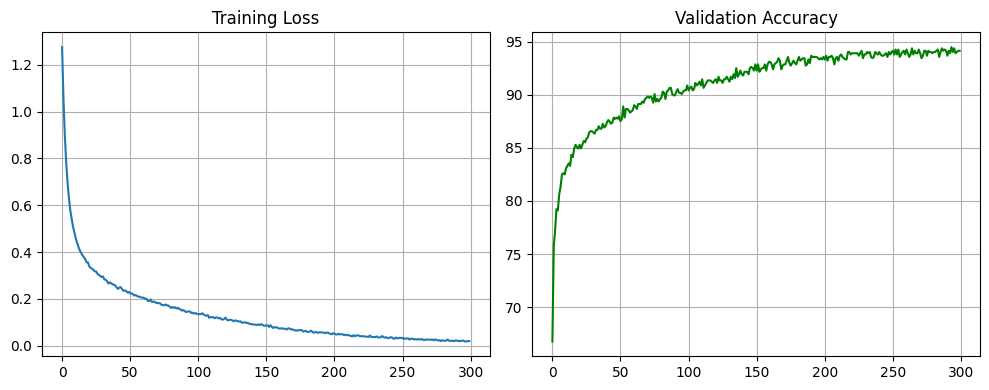

In [7]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import timm
from tqdm import tqdm
import matplotlib.pyplot as plt

# === 1. Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

train_dir = "Group6-BrainTumor/dataset/Training"
test_dir = "Group6-BrainTumor/dataset/Testing"
image_size = 224
batch_size = 64
epochs = 300

# === 2. Transforms and Dataset Loading
transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

train_size = int(0.85 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_data, val_data = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

num_classes = len(train_dataset.classes)
print(f"📂 Classes: {train_dataset.classes}")

# === 3. Model Setup and Fine-Tuning Strategy
model = timm.create_model('efficientnetv2_rw_t', pretrained=True)
model.classifier = nn.Linear(model.classifier.in_features, num_classes)

# Freeze entire model
for param in model.parameters():
    param.requires_grad = False

# Unfreeze only last block, conv head, and classifier
for name, param in model.named_parameters():
    if "blocks.6" in name or "conv_head" in name or "classifier" in name:
        param.requires_grad = True

model = model.to(device)

# === 4. Optimizer and Loss
classifier_params = [p for n, p in model.named_parameters() if "classifier" in n and p.requires_grad]
last_block_params = [p for n, p in model.named_parameters() if ("blocks.6" in n or "conv_head" in n) and p.requires_grad]

optimizer = torch.optim.Adam([
    {"params": classifier_params, "lr": 1e-4},
    {"params": last_block_params, "lr": 1e-5}
])

criterion = nn.CrossEntropyLoss()

# === 5. Evaluation Function
def evaluate(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = outputs.max(1)
            total += labels.size(0)
            correct += preds.eq(labels).sum().item()
    return 100 * correct / total

# === 6. Training Loop with Best Model Tracking
train_loss_history = []
val_acc_history = []

best_val_acc = 0.0
best_model_state = None
best_epoch = 0

def train_model(model, train_loader, val_loader, epochs):
    global best_val_acc, best_model_state, best_epoch
    for epoch in range(epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, preds = outputs.max(1)
            total += labels.size(0)
            correct += preds.eq(labels).sum().item()
        train_acc = 100 * correct / total
        val_acc = evaluate(model, val_loader)

        train_loss_history.append(running_loss / len(train_loader))
        val_acc_history.append(val_acc)

        print(f"Epoch {epoch+1}: Loss={running_loss/len(train_loader):.4f}, "
              f"Train Acc={train_acc:.2f}%, Val Acc={val_acc:.2f}%")

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_state = model.state_dict()
            best_epoch = epoch

# === 7. Train and Evaluate
train_model(model, train_loader, val_loader, epochs=epochs)

# Save best model
torch.save(best_model_state, "efficientnetv2_best.pth")
print(f"\n💾 Best model saved from epoch {best_epoch+1} with val acc {best_val_acc:.2f}%")

# Load best model for testing
model.load_state_dict(best_model_state)
test_acc = evaluate(model, test_loader)
print(f"🧪 Final Test Accuracy (best model): {test_acc:.2f}%")

# === 8. Plot Loss and Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label="Train Loss")
plt.title("Training Loss")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(val_acc_history, label="Validation Accuracy", color="green")
plt.title("Validation Accuracy")
plt.grid()

plt.tight_layout()
plt.show()


## Testing on some set of images


<ipython-input-15-79b1b0d7664a>:66: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-79b1b0d7664a>:74: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)


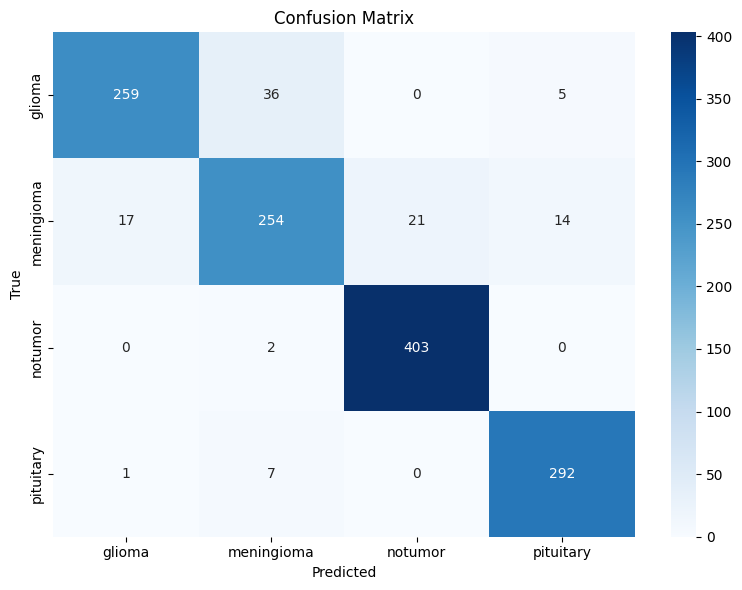

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


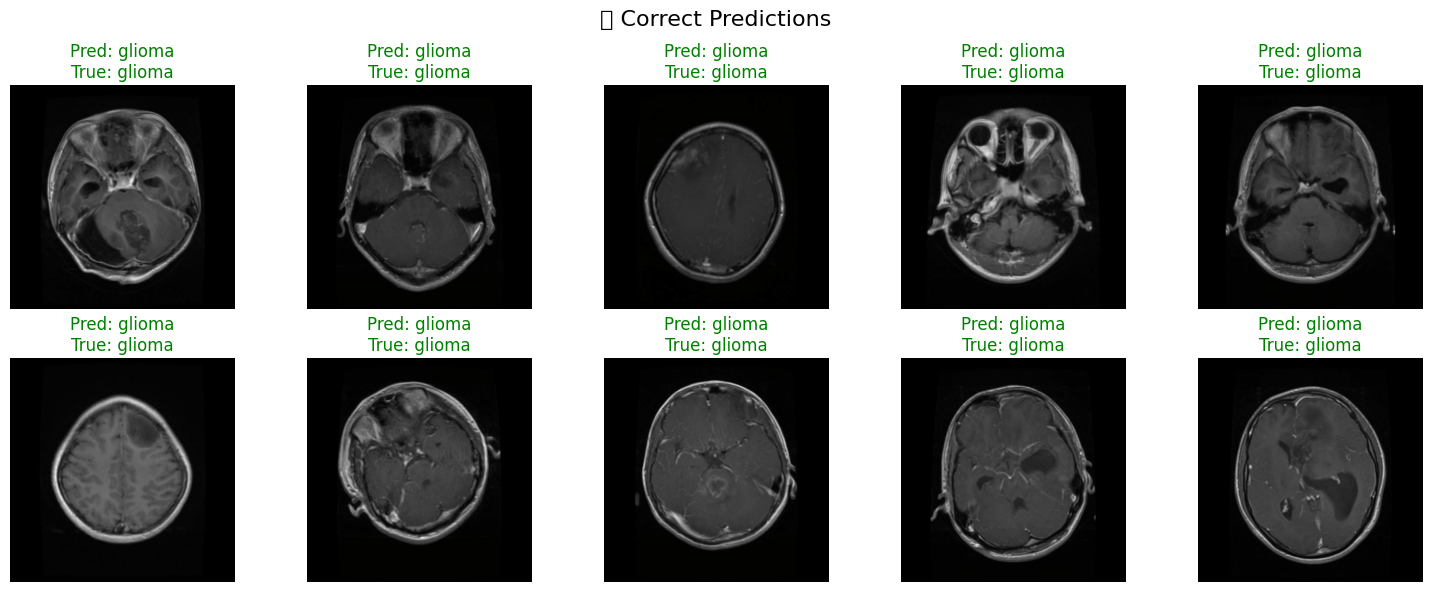

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


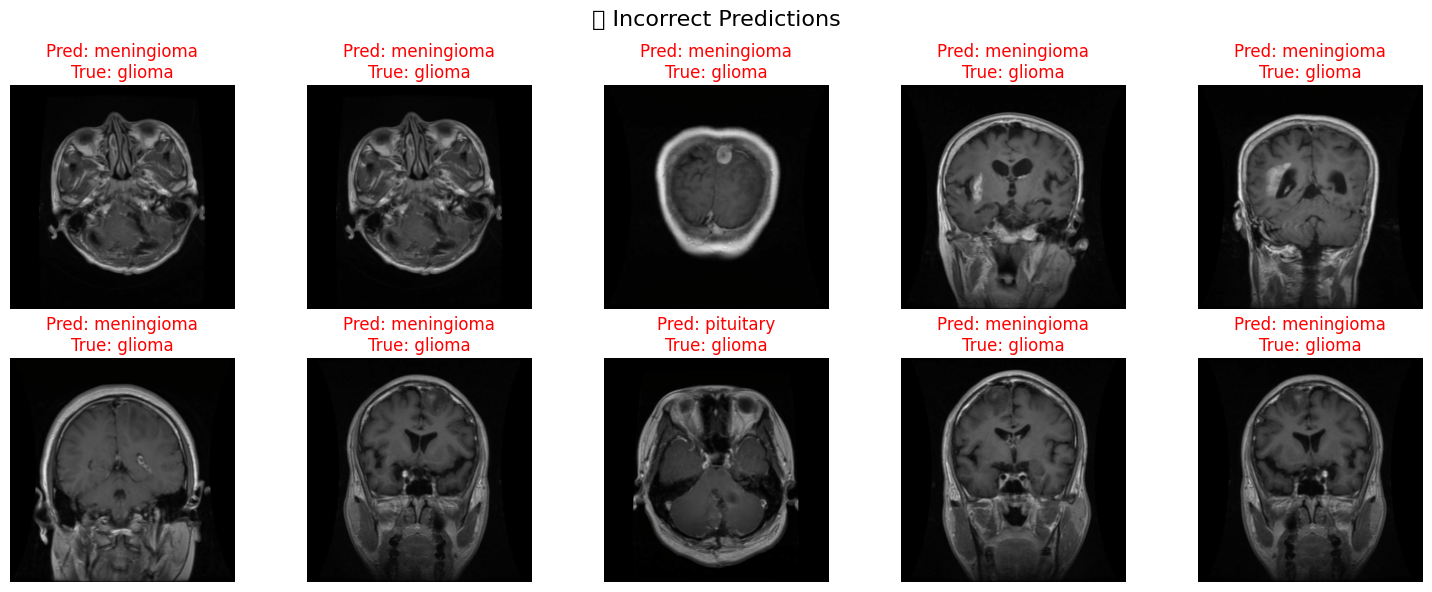

In [ ]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class_names = test_dataset.classes
num_classes = len(class_names)

model = timm.create_model('efficientnetv2_rw_t', pretrained=False)
model.classifier = torch.nn.Linear(model.classifier.in_features, num_classes)
model.load_state_dict(torch.load("efficientnetv2_finetuned.pth", map_location=device))
model.to(device)
model.eval()

all_preds = []
all_labels = []
all_images = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, preds = outputs.max(1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_images.extend(images.cpu())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)
fig_cm, ax_cm = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, ax=ax_cm)
ax_cm.set_xlabel("Predicted")
ax_cm.set_ylabel("True")
ax_cm.set_title("Confusion Matrix")
plt.tight_layout()

# Identify correctly and incorrectly predicted samples
correct_idx = [i for i in range(len(all_labels)) if all_labels[i] == all_preds[i]]
incorrect_idx = [i for i in range(len(all_labels)) if all_labels[i] != all_preds[i]]

# Select 10 correct and 10 incorrect
selected_correct = correct_idx[:10]
selected_incorrect = incorrect_idx[:10]

# Helper function to show images with prediction info
def imshow(img, label, pred, is_wrong=False):
    img = img.permute(1, 2, 0).numpy()
    img = np.clip(img * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406], 0, 1)
    plt.imshow(img)
    title = f"Pred: {class_names[pred]}\nTrue: {class_names[label]}"
    if is_wrong:
        plt.title(title, color='red')
    else:
        plt.title(title, color='green')
    plt.axis('off')

# Show 10 correct predictions
fig_correct, axes_correct = plt.subplots(2, 5, figsize=(15, 6))
fig_correct.suptitle("✅ Correct Predictions", fontsize=16)
for ax, idx in zip(axes_correct.flatten(), selected_correct):
    plt.sca(ax)
    imshow(all_images[idx], all_labels[idx], all_preds[idx], is_wrong=False)
plt.tight_layout()

# Show 10 incorrect predictions
fig_wrong, axes_wrong = plt.subplots(2, 5, figsize=(15, 6))
fig_wrong.suptitle("❌ Incorrect Predictions", fontsize=16)
for ax, idx in zip(axes_wrong.flatten(), selected_incorrect):
    plt.sca(ax)
    imshow(all_images[idx], all_labels[idx], all_preds[idx], is_wrong=True)
plt.tight_layout()


### Visual explanation of the predictions


In [ ]:
!pip install torchcam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 116.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
print(len(model.blocks))


6


✅ Grad-CAM on Correct Predictions


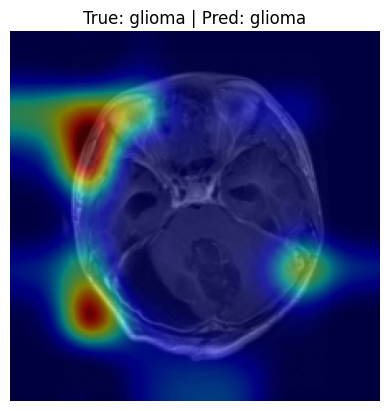

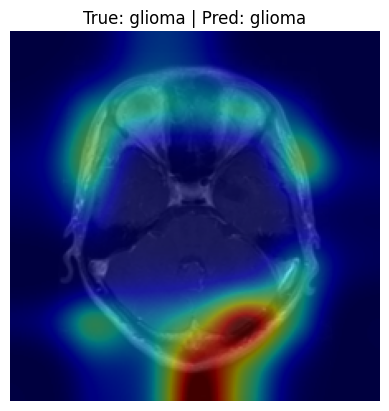

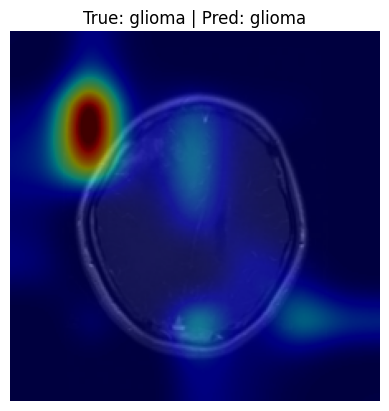

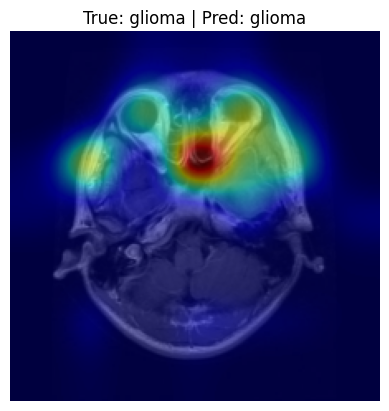

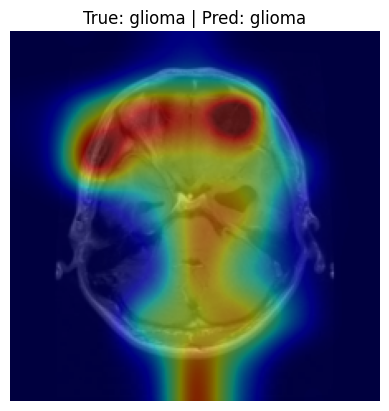

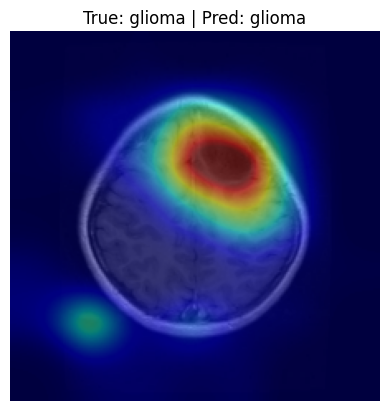

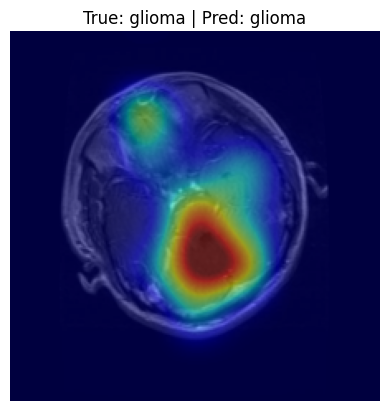

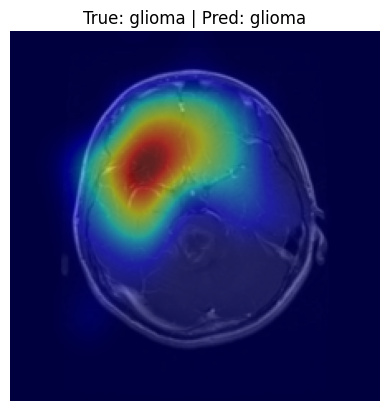

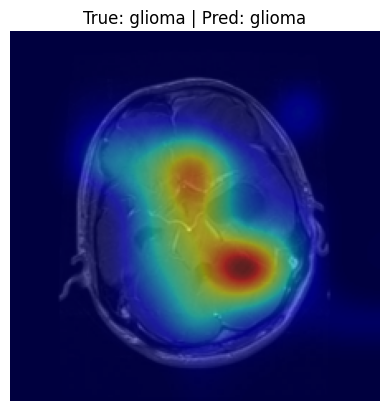

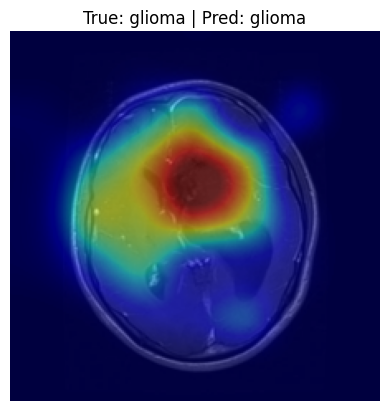

❌ Grad-CAM on Incorrect Predictions


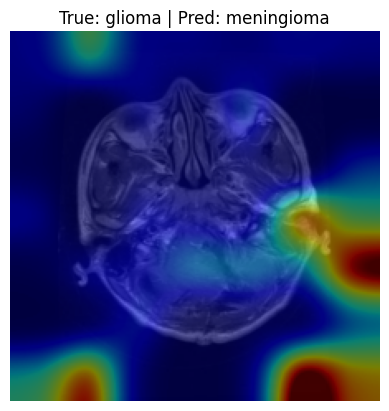

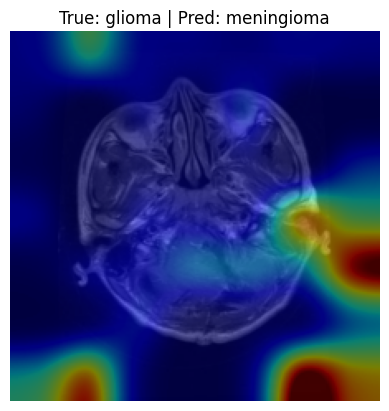

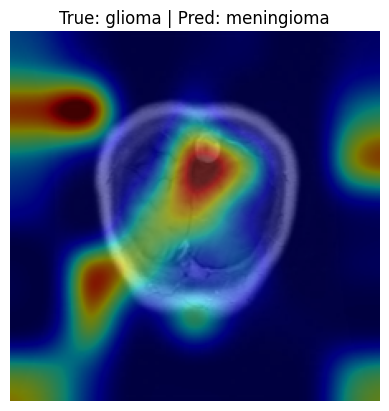

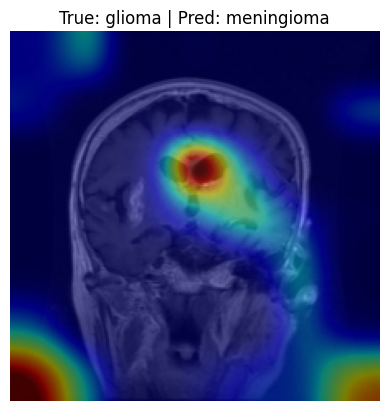

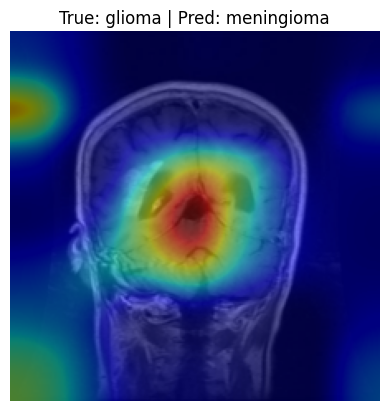

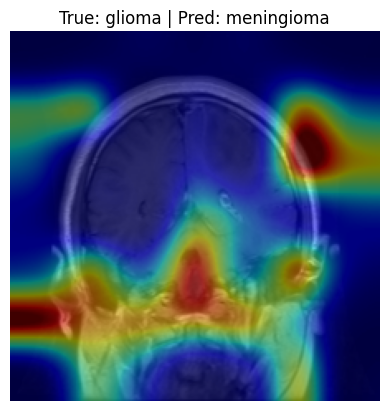

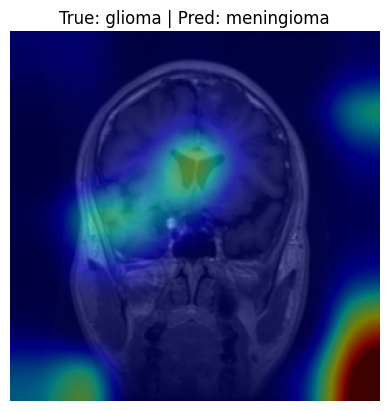

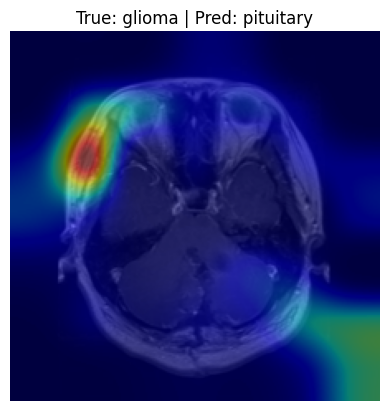

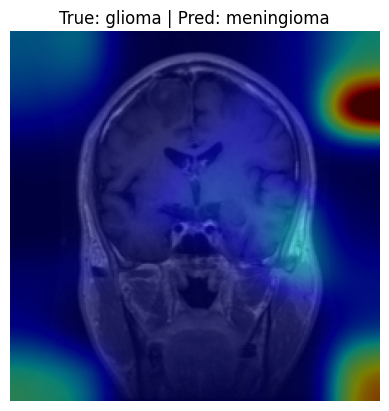

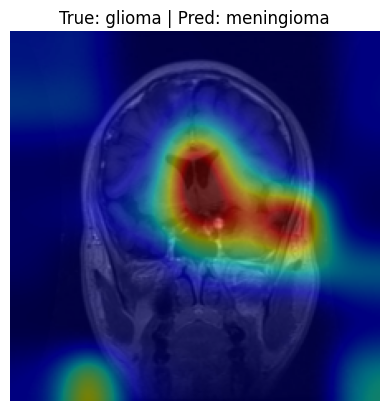

In [ ]:
from torchcam.methods import GradCAM
from torchvision.transforms.functional import to_pil_image
import matplotlib.pyplot as plt
from torchcam.utils import overlay_mask
from PIL import Image


# Attach GradCAM to final convolution layer of EfficientNetV2
cam_extractor = GradCAM(model, target_layer=model.blocks[5])


# Apply to one image
def show_gradcam(image_tensor, label, pred):
    image = image_tensor.unsqueeze(0).to(device)  # add batch dim
    output = model(image)
    class_idx = output.argmax().item()

    # Extract CAM
    cam = cam_extractor(class_idx, output)[0].cpu()

    # Convert to image and overlay
    raw_img = image_tensor.cpu()
    to_img = to_pil_image(raw_img * torch.tensor([0.229, 0.224, 0.225]).view(3,1,1)
                                    + torch.tensor([0.485, 0.456, 0.406]).view(3,1,1))

    cam_img = overlay_mask(to_img, to_pil_image(cam, mode='F'), alpha=0.5)

    plt.imshow(cam_img)
    plt.title(f"True: {class_names[label]} | Pred: {class_names[pred]}")
    plt.axis("off")
    plt.show()

print("✅ Grad-CAM on Correct Predictions")
for idx in selected_correct:
    show_gradcam(all_images[idx], all_labels[idx], all_preds[idx])

print("❌ Grad-CAM on Incorrect Predictions")
for idx in selected_incorrect:
    show_gradcam(all_images[idx], all_labels[idx], all_preds[idx])
